In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
%matplotlib inline

In [2]:
# Load the city data

filename = '../data/cities.json'

df = pd.read_json(filename)
df.head()

,city,growth_from_2000_to_2013,latitude,longitude,population,rank,state
0,New York,4.8%,40.712784,-74.005941,8405837,1,New York
1,Los Angeles,4.8%,34.052234,-118.243685,3884307,2,California
2,Chicago,-6.1%,41.878114,-87.629798,2718782,3,Illinois
3,Houston,11.0%,29.760427,-95.369803,2195914,4,Texas
4,Philadelphia,2.6%,39.952584,-75.165222,1553165,5,Pennsylvania


# Beyond 1

Create a histogram of the growth rates among cities in both Texas and Michigan.

<AxesSubplot:ylabel='Frequency'>

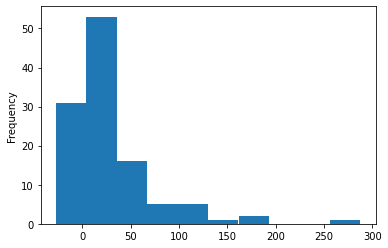

In [3]:
df.loc[df['state'].isin(['Texas', 'Michigan']), ['city','growth_from_2000_to_2013']].set_index('city')['growth_from_2000_to_2013'].str.rstrip('%').astype(np.float16).plot.hist()

# Beyond 2

Create a histogram of the growth rates among cities in both Texas and California.

<AxesSubplot:ylabel='Frequency'>

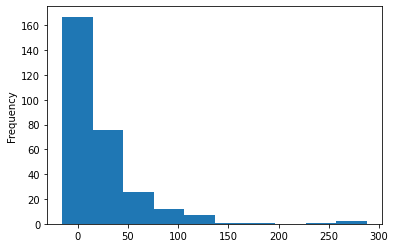

In [4]:
df.loc[df['state'].isin(['Texas', 'California']), ['city','growth_from_2000_to_2013']].set_index('city')['growth_from_2000_to_2013'].str.rstrip('%').replace('', np.NaN).dropna().astype(np.float16).plot.hist()

# Beyond 3

Create a bar plot from the average growth per state.

<AxesSubplot:xlabel='state'>

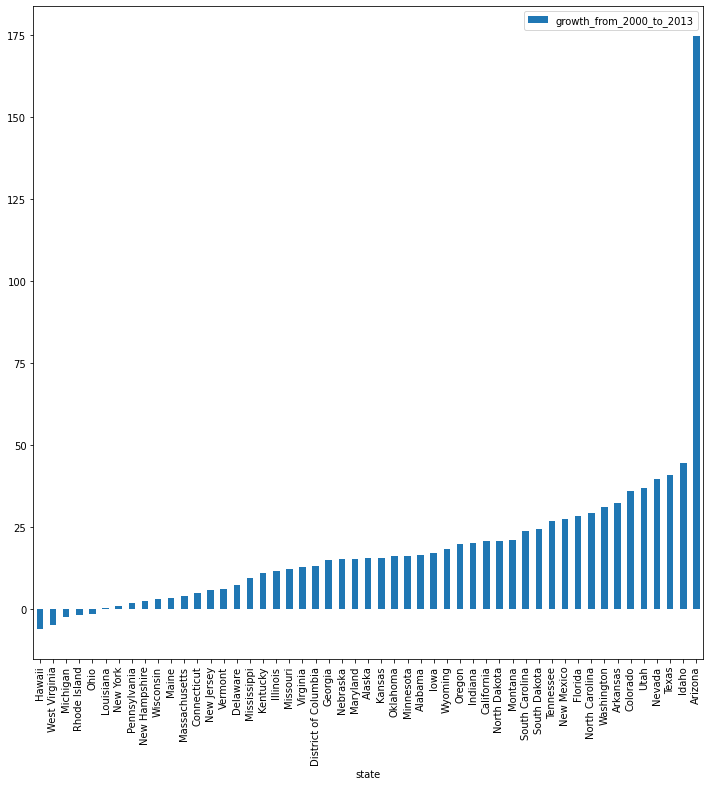

In [5]:
state_growth_df = df[['state','growth_from_2000_to_2013']].set_index('state')
state_growth_df = state_growth_df['growth_from_2000_to_2013'].str.rstrip('%').replace('', np.NaN).dropna().astype(np.float16).reset_index()
state_growth_df.groupby('state').mean().sort_values(by='growth_from_2000_to_2013').plot.bar(figsize=(12,12))